### Traffic in Neighborhoods

Traffic positively correlates with both air and noise pollution, less of it theoretically means a more environmentally sound neighborhood.

In [51]:
# imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

Here is some data about traffic in Pittsburgh:

In [55]:
# import dataset
traffic  = pd.read_csv('Datasets\TrafficCountData.csv')
# print first 10 entries
traffic.head(10)

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6,42003060500,6,6,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9,42003090200,2,9,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28,42003563000,5,28,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14,42003140800,3,14,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26,42003260200,1,26,1.0,1-15
5,1041392556,76,5.713472e+08,2019-03-22,2019-03-29,1046.0,NaN,2,StatTrak,25.0,...,-80.014234,40.458106,Central Northside,6.0,25,42003250300,1,25,1.0,1-21
6,1047444948,17,1.366891e+09,2018-10-18,NaN,NaN,NaN,NaN,NaN,25.0,...,-79.942273,40.446282,Squirrel Hill North,8.0,14,42003140100,3,14,4.0,2-26
7,1053645660,87,8.042089e+08,2019-04-18,2019-04-26,3015.0,NaN,4,StatTrak,25.0,...,-79.964592,40.457119,Polish Hill,7.0,6,42003060500,6,6,2.0,2-6
8,1073440033,156,1.736165e+09,2017-07-28,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.960385,40.438983,Central Oakland,3.0,4,42003040500,3,4,4.0,2-14
9,1092885547,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-79.920958,40.467294,East Liberty,9.0,11,42003111300,2,11,5.0,3-8


Here we are going to find the average daily car traffic across all neighborhoods. To do this we need to find the average traffic data value for every data entry that is the average car traffic for a given day, then sort them in descending order to see which neighborhoods are lowest in traffic.

In [89]:
# group data by neighborhood, get mean of average_daily_car_traffic on them, sort values, and drop any NaN values
trafficData = traffic.groupby('neighborhood')['average_daily_car_traffic'].mean().sort_values().dropna()
trafficData

neighborhood
Spring Hill-City View           63.000000
South Side Flats               115.000000
Lincoln Place                  126.000000
Lincoln-Lemington-Belmar       195.000000
Fineview                       419.000000
Allegheny West                 477.000000
New Homestead                  666.000000
Greenfield                     776.500000
Overbrook                      777.000000
Upper Hill                     953.333333
Spring Garden                 1226.000000
Central Northside             1284.000000
Hazelwood                     1289.500000
Elliott                       1342.666667
Beechview                     1418.333333
Windgap                       1531.000000
Highland Park                 1564.733333
Beltzhoover                   1577.000000
Lower Lawrenceville           1736.000000
Bluff                         1788.333333
East Allegheny                1924.000000
Carrick                       1969.571429
Central Lawrenceville         2009.000000
Morningside          

From this we see the average traffic for each neighborhood across the dates given in our dataset. From these results it shows that Spring Hill-City View has the lowest amount of car traffic.

Here is a bar graph of these results for a visualization:

<AxesSubplot:xlabel='neighborhood'>

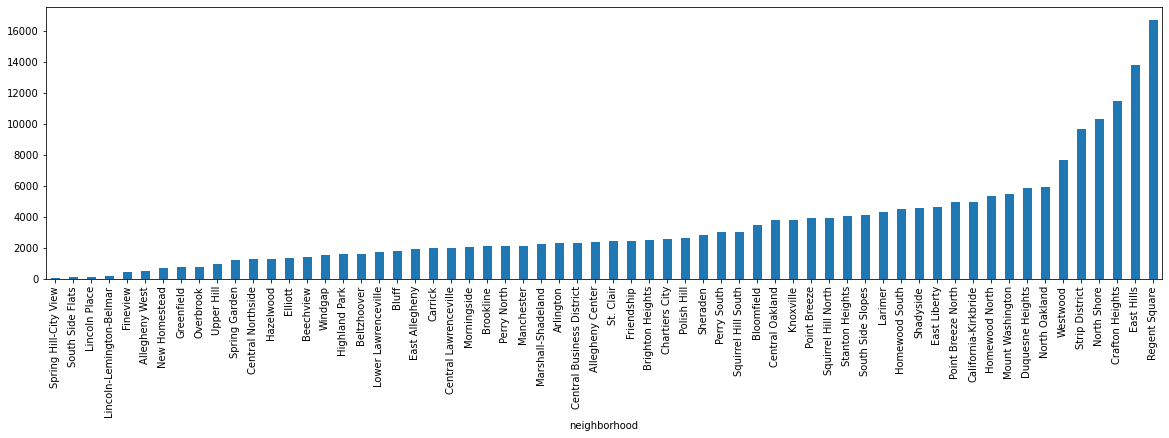

In [70]:
trafficData.plot.bar(figsize=[20,5])

From this we can see notably low relative car traffic in Spring Hill-City View, South Side Flats, Lincoln Place, and Lincoln-Lemington-Belmar with notably high relative car traffic in Westwood, Strip District, North Shore, Crafton Heights, East Hills, and Regent Square.

Here is a choropleth map of neighborhoods by their average car traffic:

<AxesSubplot:>

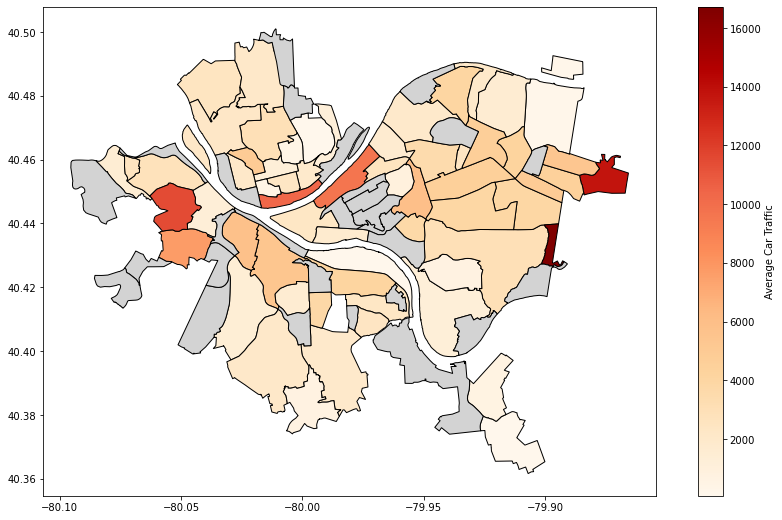

In [94]:
# read neighborhood dataset
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# merge neighborgood and trafficData
trafficMap = neighborhoods.merge(trafficData, how='left', left_on='hood', right_on='neighborhood')
# plot
trafficMap.plot(column='average_daily_car_traffic',
             cmap='OrRd',
             edgecolor="black",
             legend=True,
             legend_kwds={'label':"Average Car Traffic"},
             figsize=(15, 9),
             missing_kwds={"color": "lightgrey"})